In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix

In [2]:
df = pd.read_csv('resampled.csv')
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]

In [3]:
y_train_pred = gb_model.predict(X_train)
y_train_prob = gb_model.predict_proba(X_train)[:, 1]

train_metrics = {
    "Accuracy": accuracy_score(y_train, y_train_pred),
    "Precision": precision_score(y_train, y_train_pred),
    "Recall": recall_score(y_train, y_train_pred),
    "F1 Score": f1_score(y_train, y_train_pred),
    "ROC AUC": roc_auc_score(y_train, y_train_prob)
}

# --- Testing Metrics ---
y_test_pred = gb_model.predict(X_test)
y_test_prob = gb_model.predict_proba(X_test)[:, 1]

test_metrics = {
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred),
    "Recall": recall_score(y_test, y_test_pred),
    "F1 Score": f1_score(y_test, y_test_pred),
    "ROC AUC": roc_auc_score(y_test, y_test_prob)
}

print("TRAINING METRICS:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nTESTING METRICS:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

TRAINING METRICS:
Accuracy: 0.8528
Precision: 0.8612
Recall: 0.8442
F1 Score: 0.8526
ROC AUC: 0.9341

TESTING METRICS:
Accuracy: 0.8221
Precision: 0.8102
Recall: 0.8242
F1 Score: 0.8171
ROC AUC: 0.9087


In [4]:
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

# Print results
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
total = TP+TN+FP+FN

accuracy = (TP+TN)/total
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*(precision * recall)/(precision + recall)
print(accuracy)
print(precision)
print(recall)
print(f1_score)

True Positives (TP): 572
True Negatives (TN): 611
False Positives (FP): 134
False Negatives (FN): 122
0.8220986796386379
0.8101983002832861
0.8242074927953891
0.8171428571428571


In [18]:
import joblib
joblib.dump(gb_model, 'gb_model.pkl')

['gb_model.pkl']

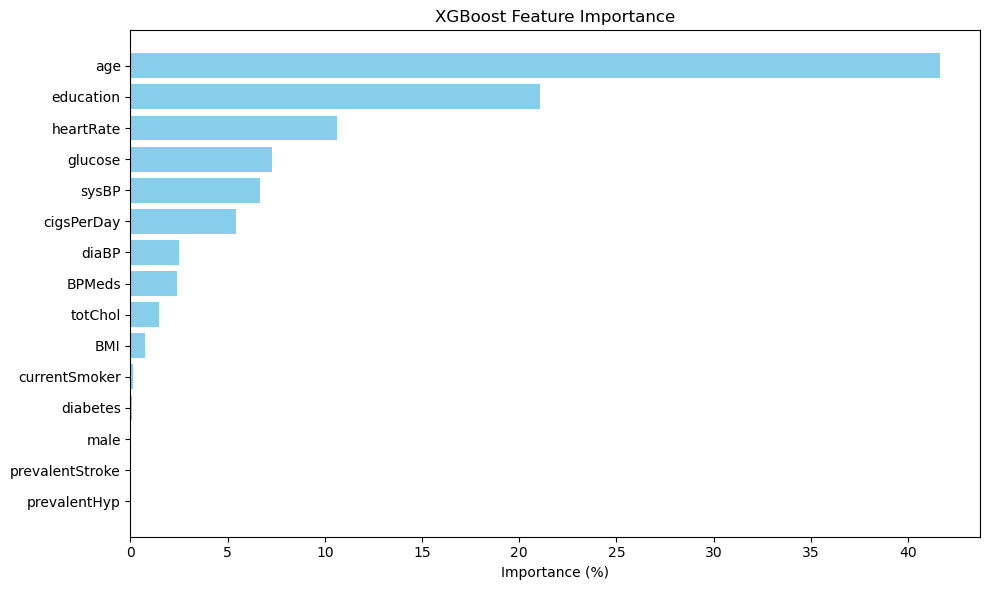

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the model
importances = gb_model.feature_importances_

# Convert to percentages
importances_percent = 100.0 * (importances / importances.sum())

# Create a DataFrame for better handling
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance (%)': importances_percent
}).sort_values(by='Importance (%)', ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance (%)'], color='skyblue')
plt.xlabel('Importance (%)')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Most important on top
plt.tight_layout()
plt.show()
